## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9820871	total: 58.7ms	remaining: 58.6s
1:	learn: 0.9631146	total: 59.8ms	remaining: 29.8s
2:	learn: 0.9426518	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9260028	total: 61.6ms	remaining: 15.3s
4:	learn: 0.9095052	total: 62.7ms	remaining: 12.5s
5:	learn: 0.8933009	total: 63.7ms	remaining: 10.6s
6:	learn: 0.8765461	total: 64.6ms	remaining: 9.16s
7:	learn: 0.8606542	total: 65.5ms	remaining: 8.12s
8:	learn: 0.8457418	total: 66.2ms	remaining: 7.29s
9:	learn: 0.8292022	total: 67ms	remaining: 6.63s
10:	learn: 0.8136798	total: 67.8ms	remaining: 6.1s
11:	learn: 0.7996564	total: 68.6ms	remaining: 5.65s
12:	learn: 0.7848067	total: 69.4ms	remaining: 5.27s
13:	learn: 0.7709931	total: 70.5ms	remaining: 4.96s
14:	learn: 0.7576129	total: 71.4ms	remaining: 4.69s
15:	learn: 0.7436205	total: 72.2ms	remaining: 4.44s
16:	learn: 0.7304710	total: 73ms	remaining: 4.22s
17:	learn: 0.7177069	total: 73.9ms	remaining: 4.03s
18:	learn: 0.7054223	total: 74.6ms	remaining: 3.8

60:	learn: 0.4067323	total: 109ms	remaining: 1.68s
61:	learn: 0.4029190	total: 110ms	remaining: 1.66s
62:	learn: 0.3994566	total: 111ms	remaining: 1.65s
63:	learn: 0.3949740	total: 112ms	remaining: 1.63s
64:	learn: 0.3912763	total: 113ms	remaining: 1.62s
65:	learn: 0.3868951	total: 114ms	remaining: 1.61s
66:	learn: 0.3834427	total: 115ms	remaining: 1.59s
67:	learn: 0.3808023	total: 115ms	remaining: 1.58s
68:	learn: 0.3772680	total: 116ms	remaining: 1.57s
69:	learn: 0.3746540	total: 117ms	remaining: 1.56s
70:	learn: 0.3709348	total: 118ms	remaining: 1.54s
71:	learn: 0.3672266	total: 119ms	remaining: 1.54s
72:	learn: 0.3643760	total: 120ms	remaining: 1.52s
73:	learn: 0.3609260	total: 121ms	remaining: 1.51s
74:	learn: 0.3577573	total: 122ms	remaining: 1.5s
75:	learn: 0.3555272	total: 123ms	remaining: 1.49s
76:	learn: 0.3531460	total: 123ms	remaining: 1.48s
77:	learn: 0.3509430	total: 124ms	remaining: 1.47s
78:	learn: 0.3488005	total: 125ms	remaining: 1.46s
79:	learn: 0.3461848	total: 126m

159:	learn: 0.2419972	total: 192ms	remaining: 1s
160:	learn: 0.2410465	total: 192ms	remaining: 1s
161:	learn: 0.2402253	total: 193ms	remaining: 1000ms
162:	learn: 0.2397308	total: 194ms	remaining: 997ms
163:	learn: 0.2395167	total: 195ms	remaining: 994ms
164:	learn: 0.2390857	total: 196ms	remaining: 990ms
165:	learn: 0.2383237	total: 197ms	remaining: 987ms
166:	learn: 0.2373820	total: 197ms	remaining: 984ms
167:	learn: 0.2366173	total: 198ms	remaining: 981ms
168:	learn: 0.2359325	total: 199ms	remaining: 979ms
169:	learn: 0.2354112	total: 200ms	remaining: 976ms
170:	learn: 0.2347410	total: 201ms	remaining: 973ms
171:	learn: 0.2341701	total: 201ms	remaining: 970ms
172:	learn: 0.2334371	total: 202ms	remaining: 967ms
173:	learn: 0.2331158	total: 203ms	remaining: 965ms
174:	learn: 0.2324351	total: 204ms	remaining: 962ms
175:	learn: 0.2322505	total: 205ms	remaining: 958ms
176:	learn: 0.2315791	total: 205ms	remaining: 955ms
177:	learn: 0.2312930	total: 206ms	remaining: 953ms
178:	learn: 0.230

285:	learn: 0.1803089	total: 299ms	remaining: 747ms
286:	learn: 0.1801303	total: 300ms	remaining: 746ms
287:	learn: 0.1798584	total: 301ms	remaining: 745ms
288:	learn: 0.1794516	total: 302ms	remaining: 743ms
289:	learn: 0.1789893	total: 303ms	remaining: 742ms
290:	learn: 0.1787080	total: 304ms	remaining: 741ms
291:	learn: 0.1783550	total: 305ms	remaining: 739ms
292:	learn: 0.1779356	total: 306ms	remaining: 737ms
293:	learn: 0.1776444	total: 306ms	remaining: 735ms
294:	learn: 0.1772267	total: 307ms	remaining: 734ms
295:	learn: 0.1770848	total: 308ms	remaining: 733ms
296:	learn: 0.1769155	total: 309ms	remaining: 731ms
297:	learn: 0.1765971	total: 310ms	remaining: 729ms
298:	learn: 0.1763437	total: 310ms	remaining: 727ms
299:	learn: 0.1760181	total: 311ms	remaining: 726ms
300:	learn: 0.1754810	total: 312ms	remaining: 724ms
301:	learn: 0.1752642	total: 313ms	remaining: 723ms
302:	learn: 0.1750658	total: 314ms	remaining: 721ms
303:	learn: 0.1746579	total: 314ms	remaining: 720ms
304:	learn: 

386:	learn: 0.1502684	total: 381ms	remaining: 604ms
387:	learn: 0.1499240	total: 382ms	remaining: 603ms
388:	learn: 0.1497691	total: 383ms	remaining: 602ms
389:	learn: 0.1493698	total: 384ms	remaining: 601ms
390:	learn: 0.1489195	total: 385ms	remaining: 599ms
391:	learn: 0.1487125	total: 386ms	remaining: 598ms
392:	learn: 0.1486763	total: 387ms	remaining: 597ms
393:	learn: 0.1484691	total: 388ms	remaining: 596ms
394:	learn: 0.1484313	total: 388ms	remaining: 595ms
395:	learn: 0.1482604	total: 389ms	remaining: 594ms
396:	learn: 0.1481174	total: 390ms	remaining: 592ms
397:	learn: 0.1478194	total: 391ms	remaining: 591ms
398:	learn: 0.1473828	total: 392ms	remaining: 590ms
399:	learn: 0.1469464	total: 393ms	remaining: 589ms
400:	learn: 0.1467581	total: 393ms	remaining: 588ms
401:	learn: 0.1465162	total: 394ms	remaining: 586ms
402:	learn: 0.1463961	total: 395ms	remaining: 585ms
403:	learn: 0.1460760	total: 396ms	remaining: 584ms
404:	learn: 0.1457566	total: 397ms	remaining: 583ms
405:	learn: 

517:	learn: 0.1242610	total: 489ms	remaining: 455ms
518:	learn: 0.1241242	total: 490ms	remaining: 454ms
519:	learn: 0.1238670	total: 491ms	remaining: 453ms
520:	learn: 0.1236634	total: 492ms	remaining: 452ms
521:	learn: 0.1235674	total: 493ms	remaining: 451ms
522:	learn: 0.1233509	total: 493ms	remaining: 450ms
523:	learn: 0.1230737	total: 494ms	remaining: 449ms
524:	learn: 0.1229494	total: 495ms	remaining: 448ms
525:	learn: 0.1228513	total: 496ms	remaining: 447ms
526:	learn: 0.1226157	total: 497ms	remaining: 446ms
527:	learn: 0.1222981	total: 497ms	remaining: 445ms
528:	learn: 0.1221615	total: 498ms	remaining: 444ms
529:	learn: 0.1220851	total: 499ms	remaining: 442ms
530:	learn: 0.1218584	total: 500ms	remaining: 441ms
531:	learn: 0.1215566	total: 501ms	remaining: 440ms
532:	learn: 0.1213303	total: 501ms	remaining: 439ms
533:	learn: 0.1212179	total: 502ms	remaining: 438ms
534:	learn: 0.1210169	total: 503ms	remaining: 437ms
535:	learn: 0.1208579	total: 504ms	remaining: 436ms
536:	learn: 

618:	learn: 0.1061230	total: 572ms	remaining: 352ms
619:	learn: 0.1059180	total: 573ms	remaining: 351ms
620:	learn: 0.1056588	total: 574ms	remaining: 350ms
621:	learn: 0.1054736	total: 574ms	remaining: 349ms
622:	learn: 0.1054530	total: 575ms	remaining: 348ms
623:	learn: 0.1053717	total: 576ms	remaining: 347ms
624:	learn: 0.1051822	total: 577ms	remaining: 346ms
625:	learn: 0.1050383	total: 578ms	remaining: 345ms
626:	learn: 0.1047828	total: 579ms	remaining: 344ms
627:	learn: 0.1046354	total: 580ms	remaining: 344ms
628:	learn: 0.1044568	total: 581ms	remaining: 343ms
629:	learn: 0.1042331	total: 582ms	remaining: 342ms
630:	learn: 0.1041619	total: 583ms	remaining: 341ms
631:	learn: 0.1039061	total: 583ms	remaining: 340ms
632:	learn: 0.1036995	total: 584ms	remaining: 339ms
633:	learn: 0.1035476	total: 585ms	remaining: 338ms
634:	learn: 0.1033869	total: 586ms	remaining: 337ms
635:	learn: 0.1031573	total: 586ms	remaining: 336ms
636:	learn: 0.1030518	total: 587ms	remaining: 335ms
637:	learn: 

750:	learn: 0.0879486	total: 680ms	remaining: 225ms
751:	learn: 0.0878726	total: 681ms	remaining: 225ms
752:	learn: 0.0876928	total: 681ms	remaining: 224ms
753:	learn: 0.0875694	total: 682ms	remaining: 223ms
754:	learn: 0.0873997	total: 683ms	remaining: 222ms
755:	learn: 0.0871744	total: 684ms	remaining: 221ms
756:	learn: 0.0870005	total: 685ms	remaining: 220ms
757:	learn: 0.0868419	total: 686ms	remaining: 219ms
758:	learn: 0.0866763	total: 687ms	remaining: 218ms
759:	learn: 0.0866625	total: 687ms	remaining: 217ms
760:	learn: 0.0865683	total: 688ms	remaining: 216ms
761:	learn: 0.0864384	total: 689ms	remaining: 215ms
762:	learn: 0.0863014	total: 690ms	remaining: 214ms
763:	learn: 0.0862062	total: 691ms	remaining: 213ms
764:	learn: 0.0860531	total: 691ms	remaining: 212ms
765:	learn: 0.0859448	total: 692ms	remaining: 211ms
766:	learn: 0.0859291	total: 693ms	remaining: 211ms
767:	learn: 0.0858289	total: 694ms	remaining: 210ms
768:	learn: 0.0857789	total: 695ms	remaining: 209ms
769:	learn: 

849:	learn: 0.0765329	total: 762ms	remaining: 134ms
850:	learn: 0.0764212	total: 763ms	remaining: 134ms
851:	learn: 0.0763252	total: 764ms	remaining: 133ms
852:	learn: 0.0762011	total: 765ms	remaining: 132ms
853:	learn: 0.0761272	total: 766ms	remaining: 131ms
854:	learn: 0.0759655	total: 767ms	remaining: 130ms
855:	learn: 0.0759305	total: 768ms	remaining: 129ms
856:	learn: 0.0758824	total: 769ms	remaining: 128ms
857:	learn: 0.0757594	total: 770ms	remaining: 127ms
858:	learn: 0.0755894	total: 770ms	remaining: 126ms
859:	learn: 0.0755170	total: 771ms	remaining: 126ms
860:	learn: 0.0754070	total: 772ms	remaining: 125ms
861:	learn: 0.0753266	total: 773ms	remaining: 124ms
862:	learn: 0.0752552	total: 774ms	remaining: 123ms
863:	learn: 0.0752408	total: 775ms	remaining: 122ms
864:	learn: 0.0751213	total: 775ms	remaining: 121ms
865:	learn: 0.0750850	total: 776ms	remaining: 120ms
866:	learn: 0.0749436	total: 777ms	remaining: 119ms
867:	learn: 0.0747776	total: 778ms	remaining: 118ms
868:	learn: 

977:	learn: 0.0655530	total: 870ms	remaining: 19.6ms
978:	learn: 0.0654311	total: 871ms	remaining: 18.7ms
979:	learn: 0.0653234	total: 872ms	remaining: 17.8ms
980:	learn: 0.0651939	total: 873ms	remaining: 16.9ms
981:	learn: 0.0651135	total: 873ms	remaining: 16ms
982:	learn: 0.0649956	total: 874ms	remaining: 15.1ms
983:	learn: 0.0648942	total: 875ms	remaining: 14.2ms
984:	learn: 0.0647763	total: 876ms	remaining: 13.3ms
985:	learn: 0.0647688	total: 877ms	remaining: 12.4ms
986:	learn: 0.0646848	total: 877ms	remaining: 11.6ms
987:	learn: 0.0646771	total: 878ms	remaining: 10.7ms
988:	learn: 0.0646175	total: 879ms	remaining: 9.78ms
989:	learn: 0.0645297	total: 880ms	remaining: 8.89ms
990:	learn: 0.0645221	total: 881ms	remaining: 8ms
991:	learn: 0.0644548	total: 881ms	remaining: 7.11ms
992:	learn: 0.0644111	total: 882ms	remaining: 6.22ms
993:	learn: 0.0643745	total: 883ms	remaining: 5.33ms
994:	learn: 0.0642487	total: 884ms	remaining: 4.44ms
995:	learn: 0.0642400	total: 885ms	remaining: 3.55m

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

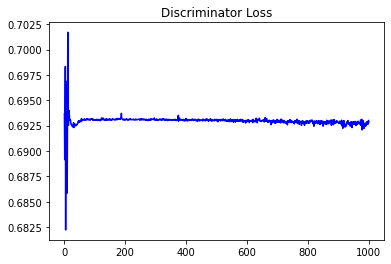

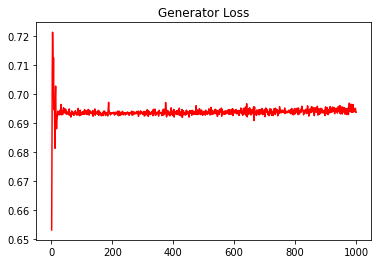

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15213433409698549


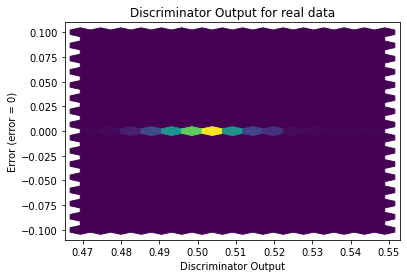

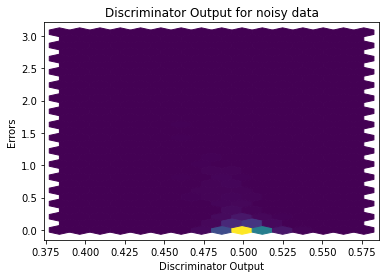

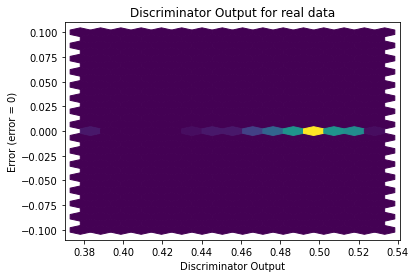

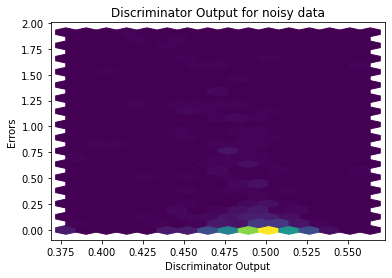

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


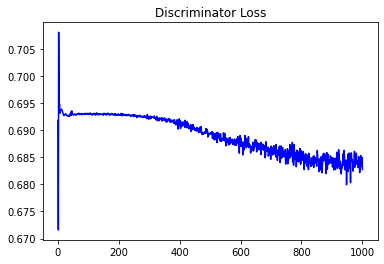

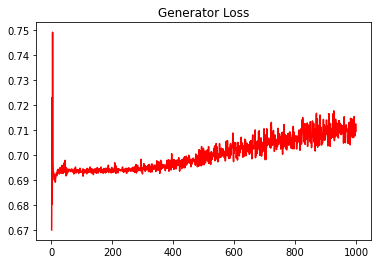

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13581547664874313


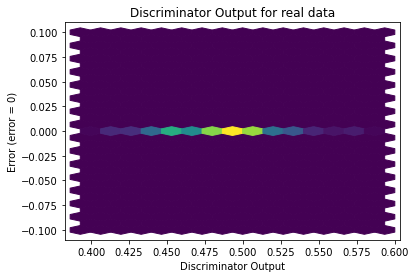

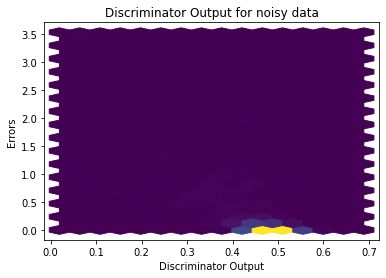

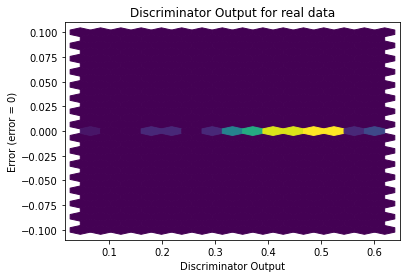

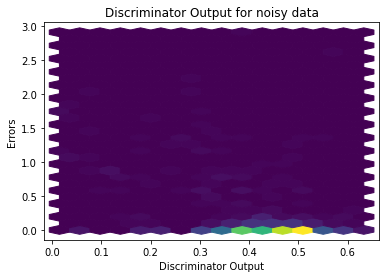

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1543]], requires_grad=True)
